In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [45]:

from collections import OrderedDict

def plot_degree_distribution(graph):
    degree_dict = dict(graph.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1,np.max(degree_sequence)+2), density=True)
    plt.loglog(bin_edges[:-1], prob, '.', marker='x')
    plt.title("Probability density function")
    plt.xlabel("degree")
    plt.ylabel("probability")
    plt.show()
    

In [44]:

def plot_degree_v_fitness(graph):
    
    area = np.pi*3
    
    degrees = []
    fitness = []
    for node in nx.nodes(graph):
        degrees.append(graph.degree(node))
        fitness.append(g.nodes[node]['fitness'])
        
    plt.scatter(fitness, degrees, s=area, alpha=0.5)
    plt.title('Degree vs Fitness')
    plt.xlabel('Fitness')
    plt.ylabel('Degree')
    plt.show()


In [43]:
    
def plot_degree_v_time(graph):
    
    area = np.pi*3
    
    degrees = []
    fitness = []
    for node in nx.nodes(graph):
        degrees.append(graph.degree(node))
        fitness.append(g.nodes[node]['time'])
        
    plt.scatter(fitness, degrees, s=area, alpha=0.5)
    plt.title('Degree vs Time Step Introduced')
    plt.xlabel('Time Step Introduced')
    plt.ylabel('Degree')
    plt.show()
    

In [42]:
    
def plot_degree_v_fitness_time(graph):
    
    area = np.pi*3
    
    degrees = []
    fitness = []
    for node in nx.nodes(graph):
        degrees.append(graph.degree(node))
        fitness.append(g.nodes[node]['fitness']/(g.nodes[node]['time']+1))
        
    plt.scatter(fitness, degrees, s=area, alpha=0.5)
    plt.title('Degree Realtive to Node Fitness and Time Introduced')
    plt.xlabel('Fitness / Time Step Introduced')
    plt.ylabel('Degree')
    plt.show()
    

In [37]:
def select_targets(g, m):

    # Check if feasible
    if len(g.nodes()) < m:
        raise ValueError('Graph has less than m nodes')

    # Compute sum of degree
    sum_degree_fitness = 0

    for i in range(0, len(g.nodes())):
        sum_degree_fitness += g.degree(i) * g.nodes[i]['fitness']

    if sum_degree_fitness == 0:
        raise ValueError('Graph as no edges')

    # Compute probabilities
    probabilities = []
    for u in g.nodes():
        probabilities.append(g.degree(u)*g.nodes[u]['fitness']/sum_degree_fitness)
    
    # Sample with replacement
    selected = np.random.choice(g.nodes(), size=m, replace=False, p=probabilities)

    return selected

def generate_fitness_graph(N, m0, m):
    
    g = nx.Graph()
    
    
    g.add_node(0)
    
    n = np.random.random()
    nx.set_node_attributes(g,n,'fitness')
    
    t = 0
    nx.set_node_attributes(g,t,'time')
    
    for i in range(1, m0):
        g.add_node(i)
        g.nodes[i]['fitness'] = np.random.random()
        g.nodes[i]['time'] = t
        g.add_edge(0,i)
    
    t += 1
    
    for j in range(m0, N):
        targets = select_targets(g, m)
        g.add_node(j)
        g.nodes[j]['fitness'] = np.random.random()
        g.nodes[j]['time'] = t
        for k in range(0, m):
            g.add_edge(k,j)
        t += 1
    
    return g


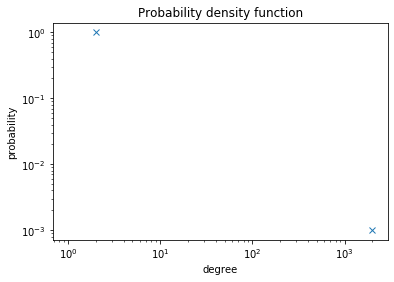

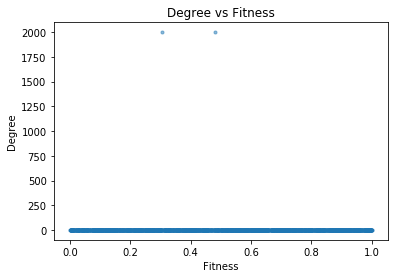

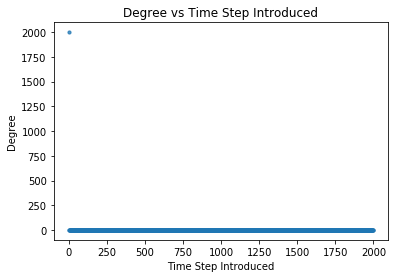

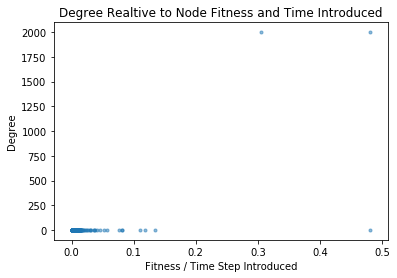

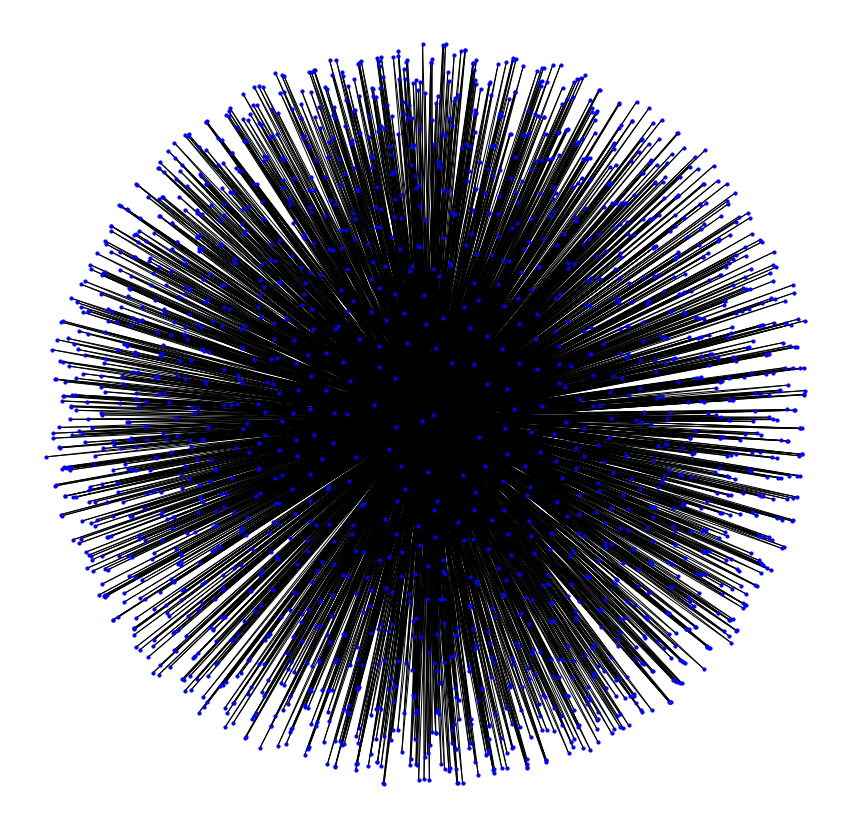

In [41]:
g = generate_fitness_graph(2000, 2, 2)
plot_degree_distribution(g)
plot_degree_v_fitness(g)
plot_degree_v_time(g)
plot_degree_v_fitness_time(g)

plt.figure(figsize=(15,15))
plt.axis('off')
pos=nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=False, node_size=10, node_color='blue')